# План исследования данных
### Дубликаты
### Пропуски
### Типы данных
### Выбросы
### Зависимости

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [26]:
df = pd.read_csv(r"data/sessions.csv", index_col=0)
df.head()

C:\Users\mirzo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,is_target_action
0,9055434745589932991.1637753792.1637753792,2.10838e+09,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust,0
1,905544597018549464.1636867290.1636867290,2.10839e+08,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow,0
2,9055446045651783499.1640648526.1640648526,2.10839e+09,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk,0
3,9055447046360770272.1622255328.1622255328,2.10839e+09,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0
4,9055447046360770272.1622255345.1622255345,2.10839e+09,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0


In [33]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1860042 entries, 0 to 1860041
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype 
---  ------                    --------------    ----- 
 0   session_id                1860042 non-null  object
 1   client_id                 1860042 non-null  object
 2   visit_date                1860042 non-null  object
 3   visit_time                1860042 non-null  object
 4   visit_number              1860042 non-null  int64 
 5   utm_source                1859945 non-null  object
 6   utm_medium                1860042 non-null  object
 7   utm_campaign              1640439 non-null  object
 8   utm_adcontent             1524427 non-null  object
 9   utm_keyword               777981 non-null   object
 10  device_category           1860042 non-null  object
 11  device_os                 789904 non-null   object
 12  device_brand              1492864 non-null  object
 13  device_model              16338 non-null  

In [35]:
# удаляем строки с неизвестным результатом
df = df[df.is_target_action != -1]
df.shape

C:\Users\mirzo\anaconda3\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(1732266, 18)

In [36]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1732266 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Non-Null Count    Dtype 
---  ------                    --------------    ----- 
 0   client_id                 1732266 non-null  object
 1   visit_date                1732266 non-null  object
 2   visit_time                1732266 non-null  object
 3   visit_number              1732266 non-null  int64 
 4   utm_source                1732190 non-null  object
 5   utm_medium                1732266 non-null  object
 6   utm_campaign              1536979 non-null  object
 7   utm_adcontent             1428129 non-null  object
 8   utm_keyword               711514 non-null   object
 9   device_category           1732266 non-null  object
 10  device_os                 718302 non-null   object
 11  device_brand              1385070 non-null  object
 12  device_model              15062 non-null    object
 13  device_screen_resolution  1732266 non-null

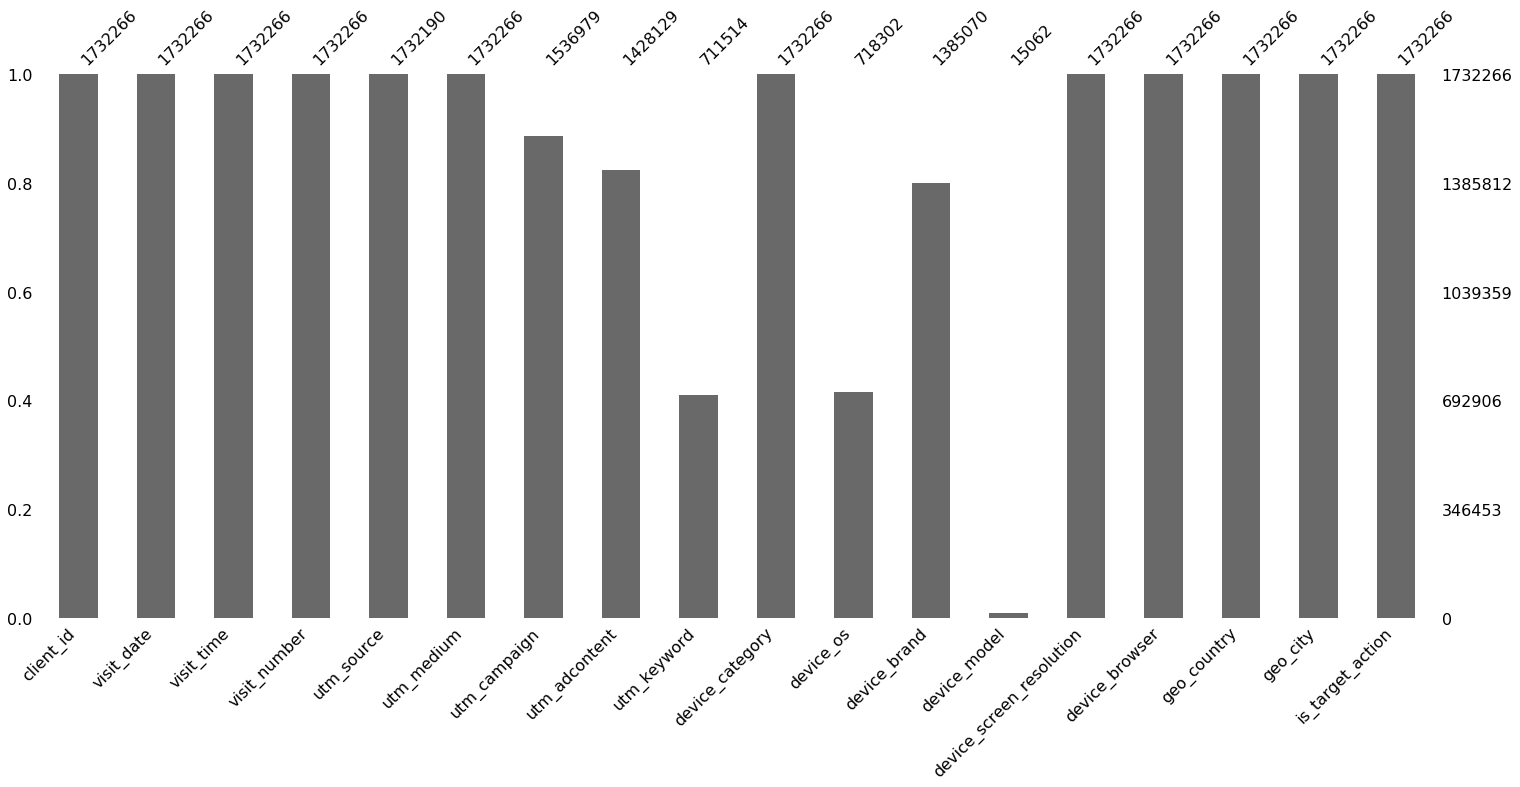

In [40]:
msno.bar(df)

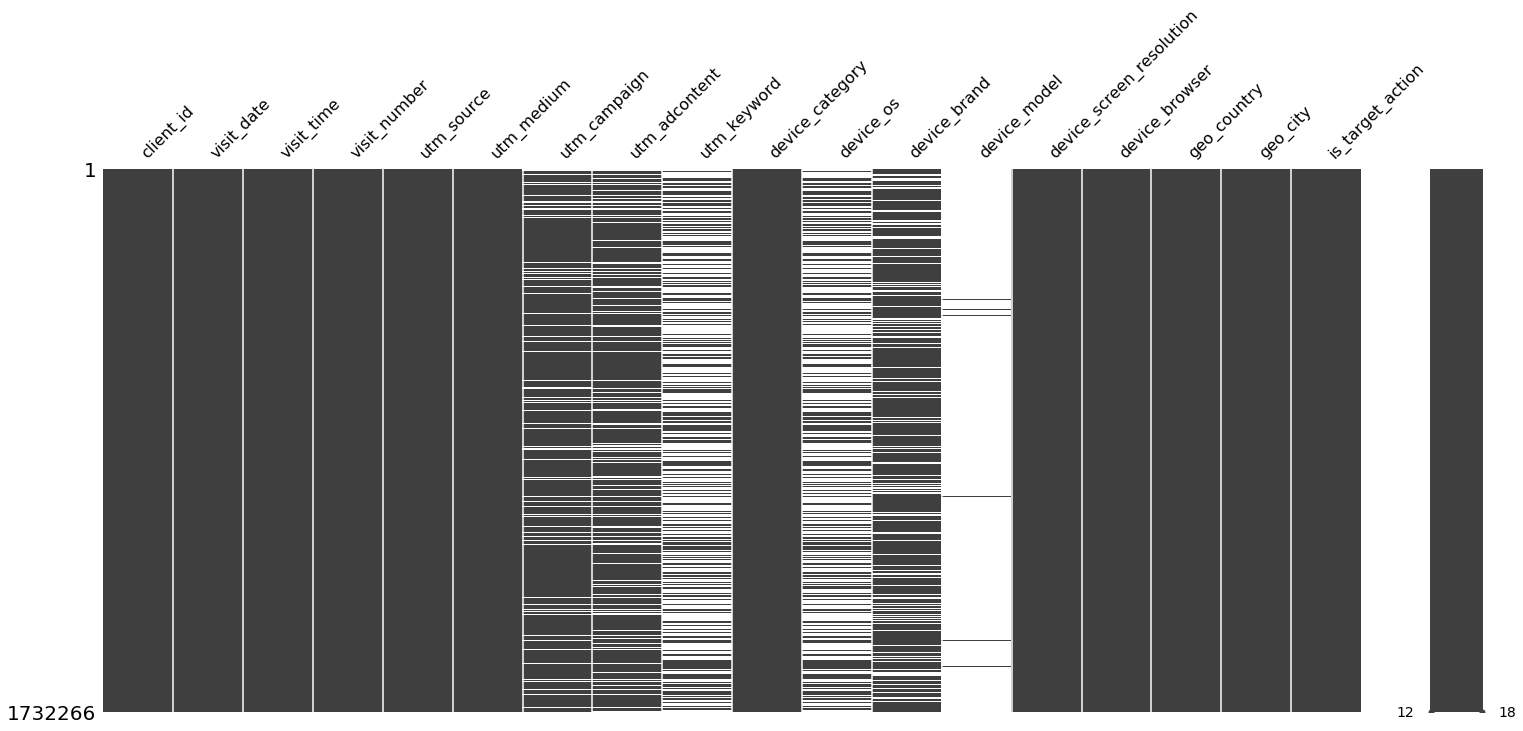

In [41]:
msno.matrix(df)

In [42]:
df_clean = df.drop(['session_id', 'utm_keyword', 'device_os', 'device_model'], axis=1)

In [43]:
df_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1732266 entries, 0 to 1860041
Data columns (total 15 columns):
 #   Column                    Non-Null Count    Dtype 
---  ------                    --------------    ----- 
 0   client_id                 1732266 non-null  object
 1   visit_date                1732266 non-null  object
 2   visit_time                1732266 non-null  object
 3   visit_number              1732266 non-null  int64 
 4   utm_source                1732190 non-null  object
 5   utm_medium                1732266 non-null  object
 6   utm_campaign              1536979 non-null  object
 7   utm_adcontent             1428129 non-null  object
 8   device_category           1732266 non-null  object
 9   device_brand              1385070 non-null  object
 10  device_screen_resolution  1732266 non-null  object
 11  device_browser            1732266 non-null  object
 12  geo_country               1732266 non-null  object
 13  geo_city                  1732266 non-null

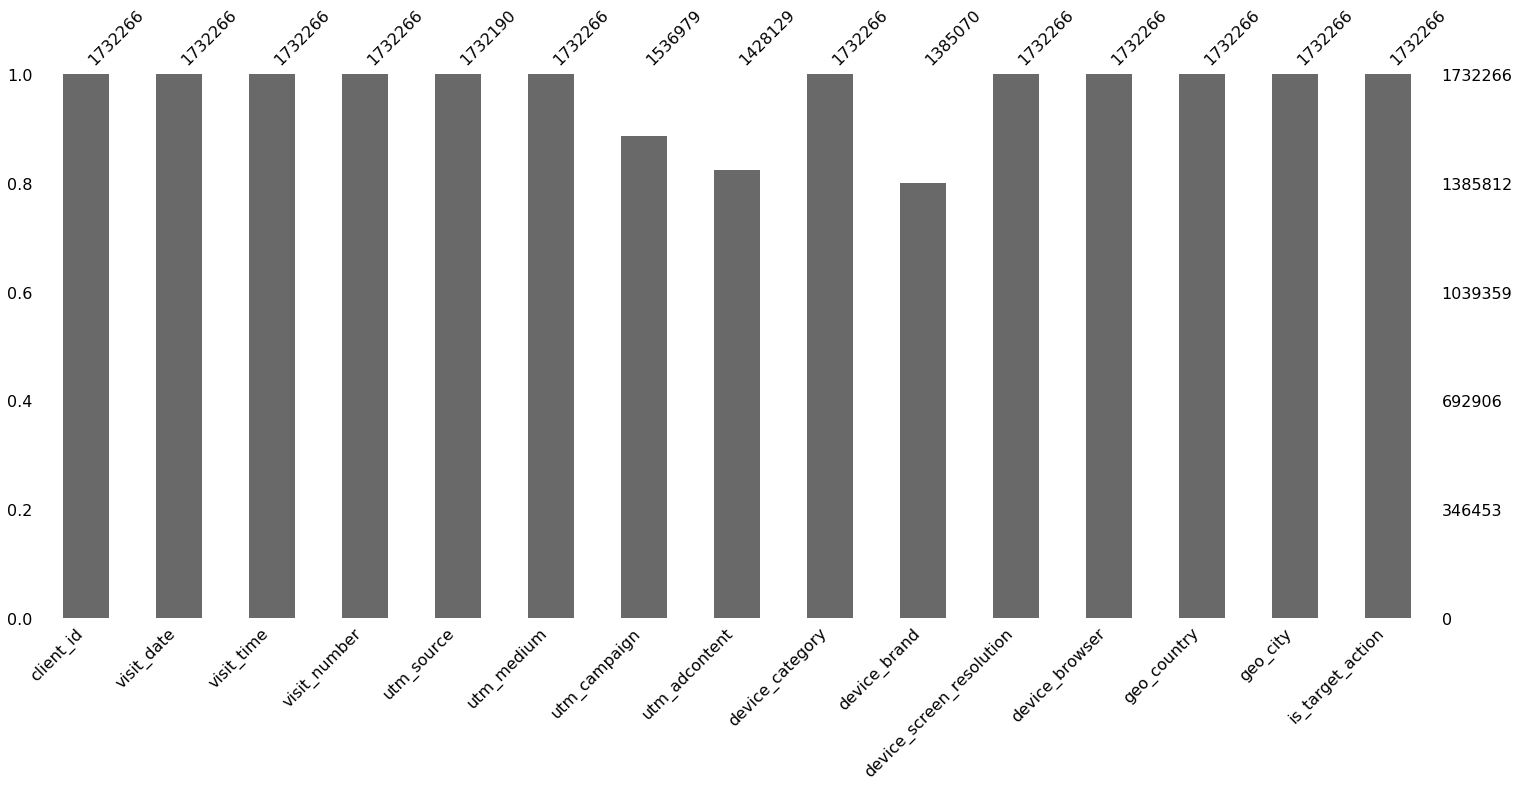

In [45]:
msno.bar(df_clean);

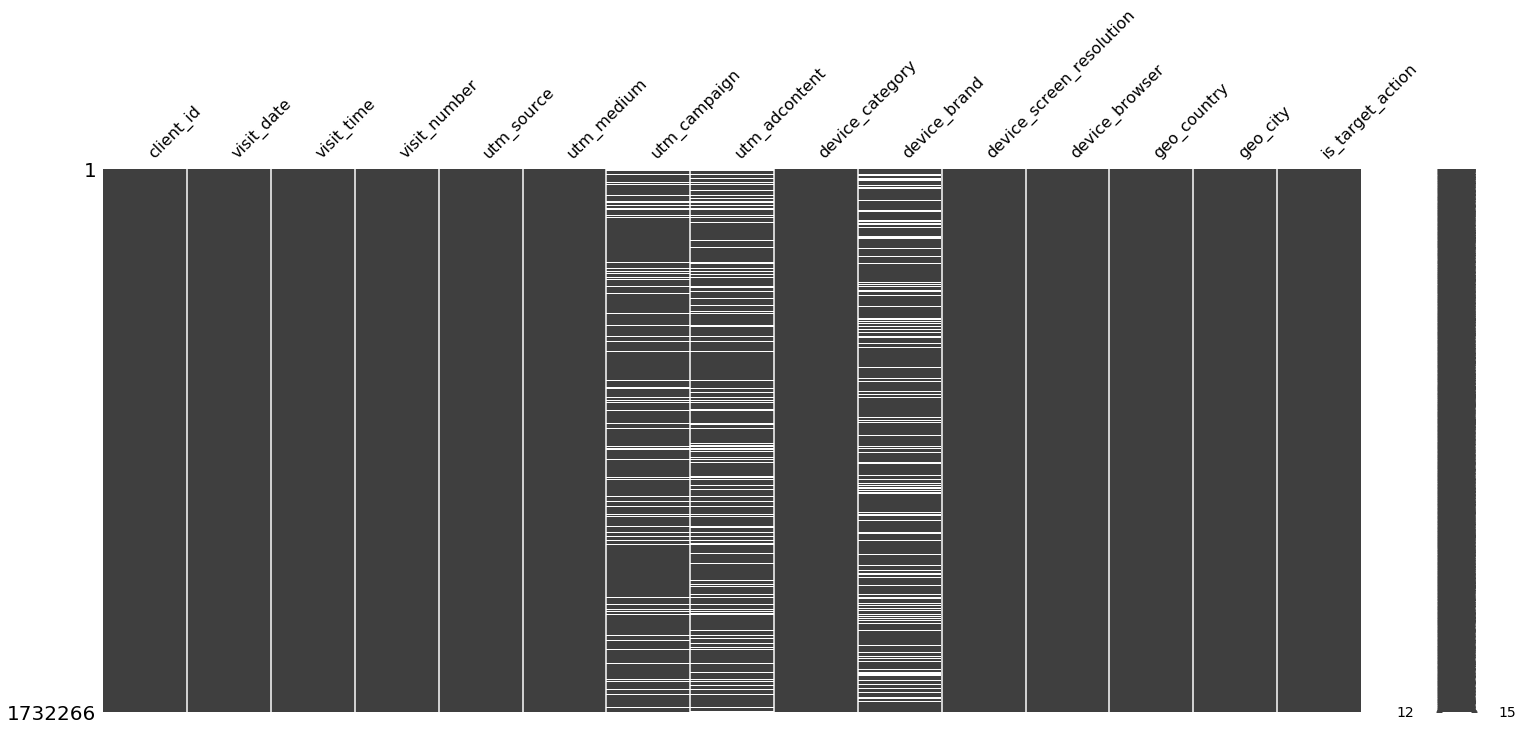

In [46]:
msno.matrix(df_clean);

In [52]:
miss_values = (df_clean.isna().sum() / len(df_clean)).sort_values()
print('Процент пропущенных значений')
miss_values

Процент пропущенных значений


client_id                   0.000000
visit_date                  0.000000
visit_time                  0.000000
visit_number                0.000000
utm_medium                  0.000000
device_category             0.000000
device_screen_resolution    0.000000
device_browser              0.000000
geo_country                 0.000000
geo_city                    0.000000
is_target_action            0.000000
utm_source                  0.000044
utm_campaign                0.112735
utm_adcontent               0.175572
device_brand                0.200429
dtype: float64

In [54]:
print('Кол-во полностью заполненных значений:', len(df_clean.dropna()))
print('Процент полностью заполненных значений:', len(df_clean.dropna()) / len(df_clean) * 100)

Кол-во полностью заполненных значений: 1150797
Процент полностью заполненных значений: 66.43304203857838


In [41]:
def draw_bar_plot(col, col_name):
    vc = col.value_counts()
    plt.figure(figsize=(20, 10));
    plt.bar(vc.index, vc.values, width=0.9, color=['springgreen', 'dodgerblue']);
    plt.xlabel(col_name);
    plt.ylabel('Количество');
    plt.xticks(rotation=45);
    for i, v in enumerate(vc.values):
        plt.text(i, v, str(v), color='black', fontweight='bold')

In [47]:
src_col = df.iloc[:, 4:17].columns
src_col

Index(['utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
       'utm_keyword', 'device_category', 'device_os', 'device_brand',
       'device_model', 'device_screen_resolution', 'device_browser',
       'geo_country', 'geo_city'],
      dtype='object')

C:\Users\mirzo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


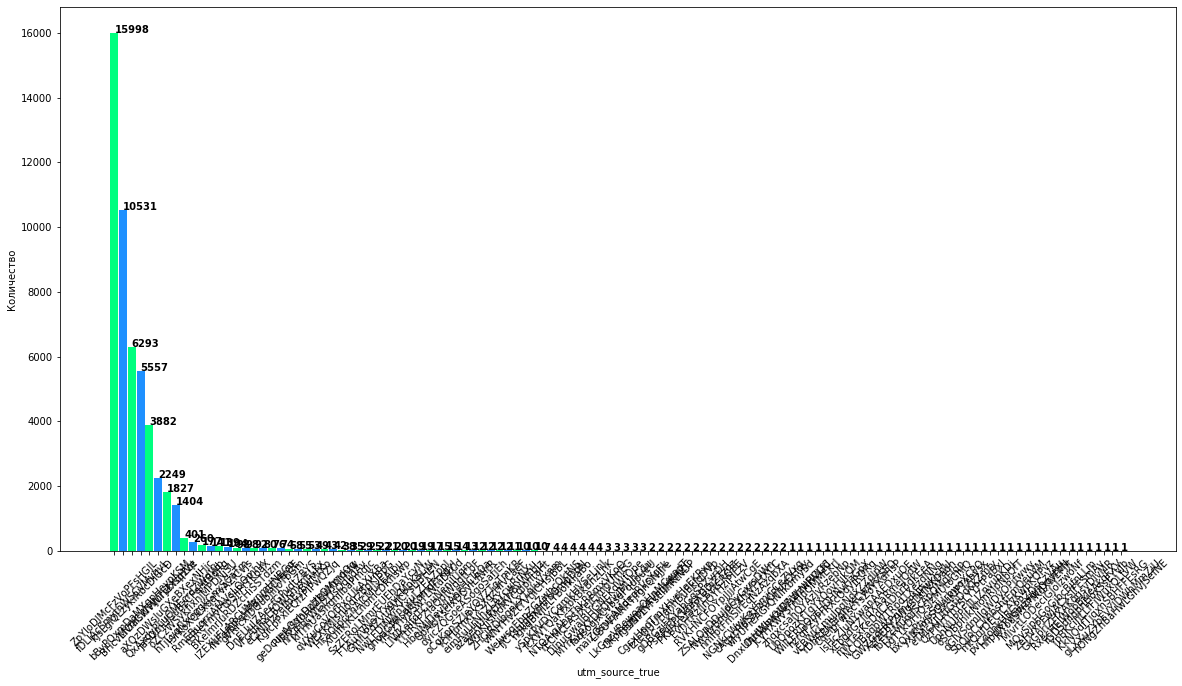

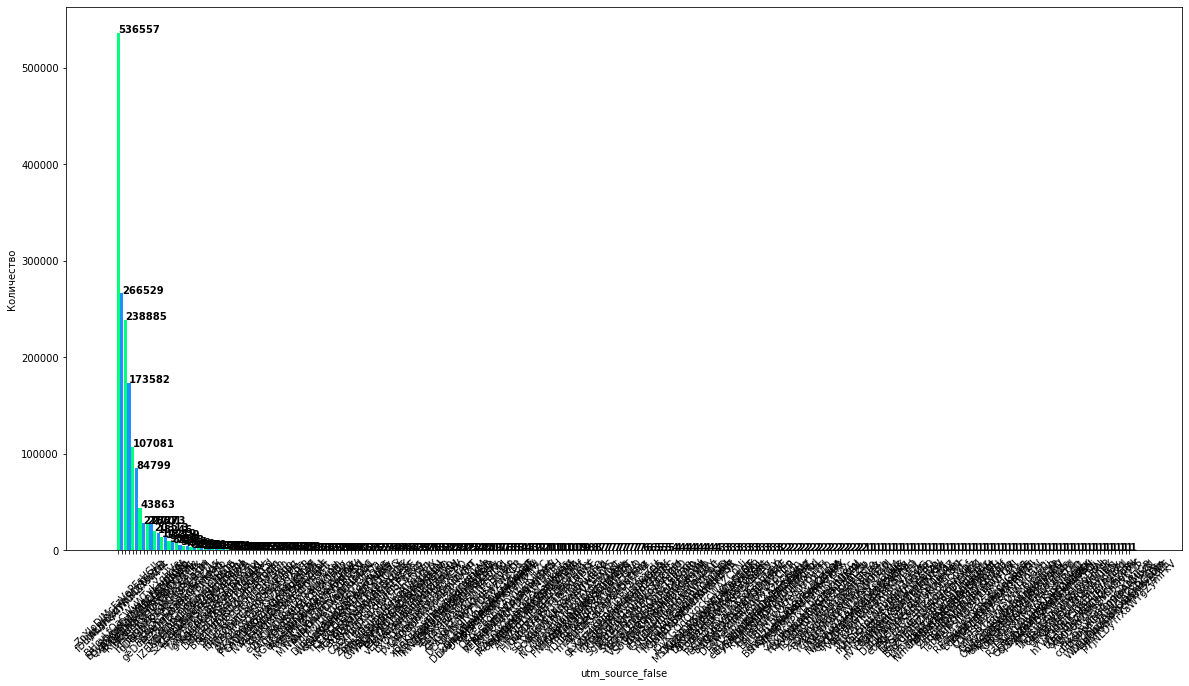

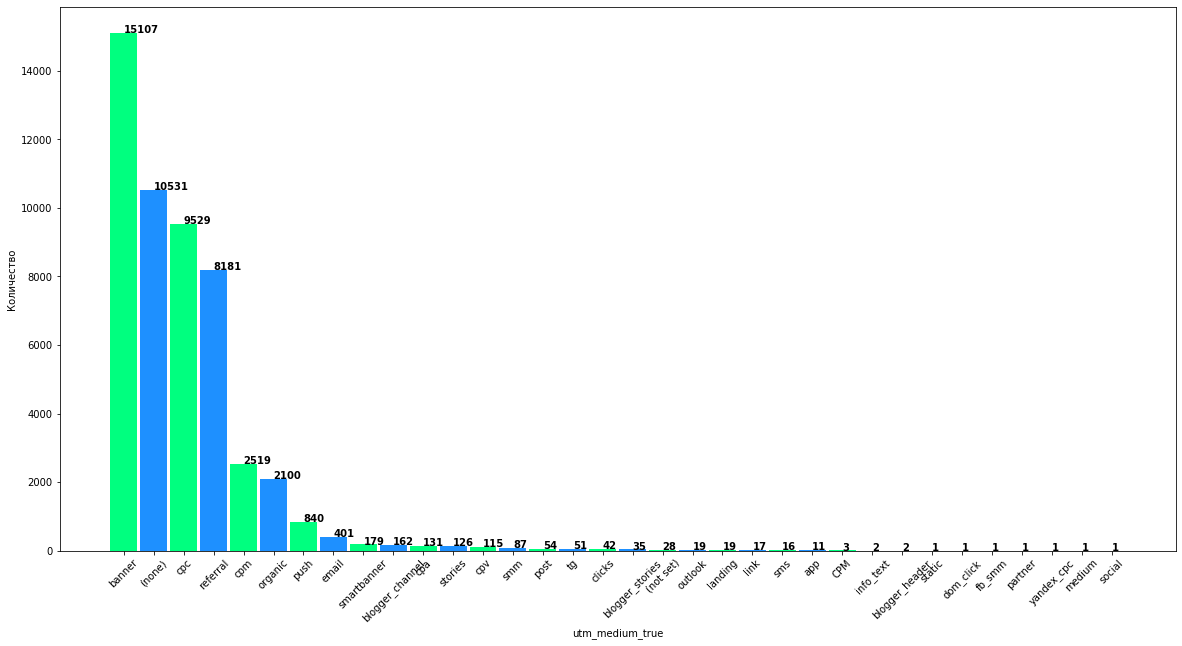

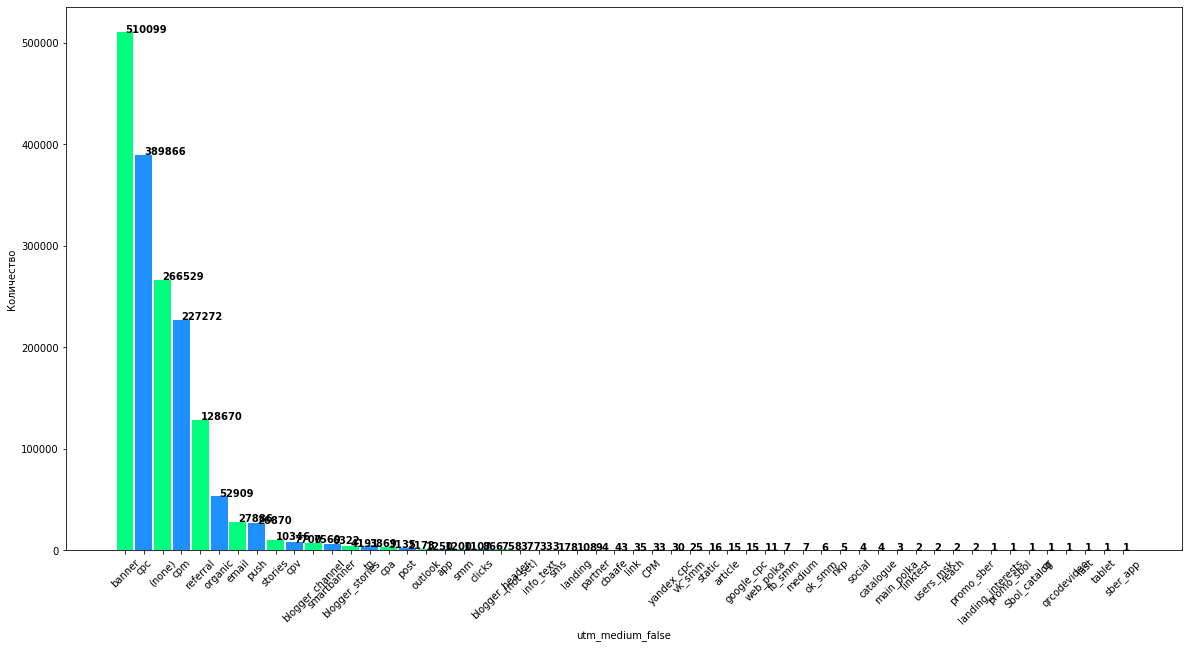

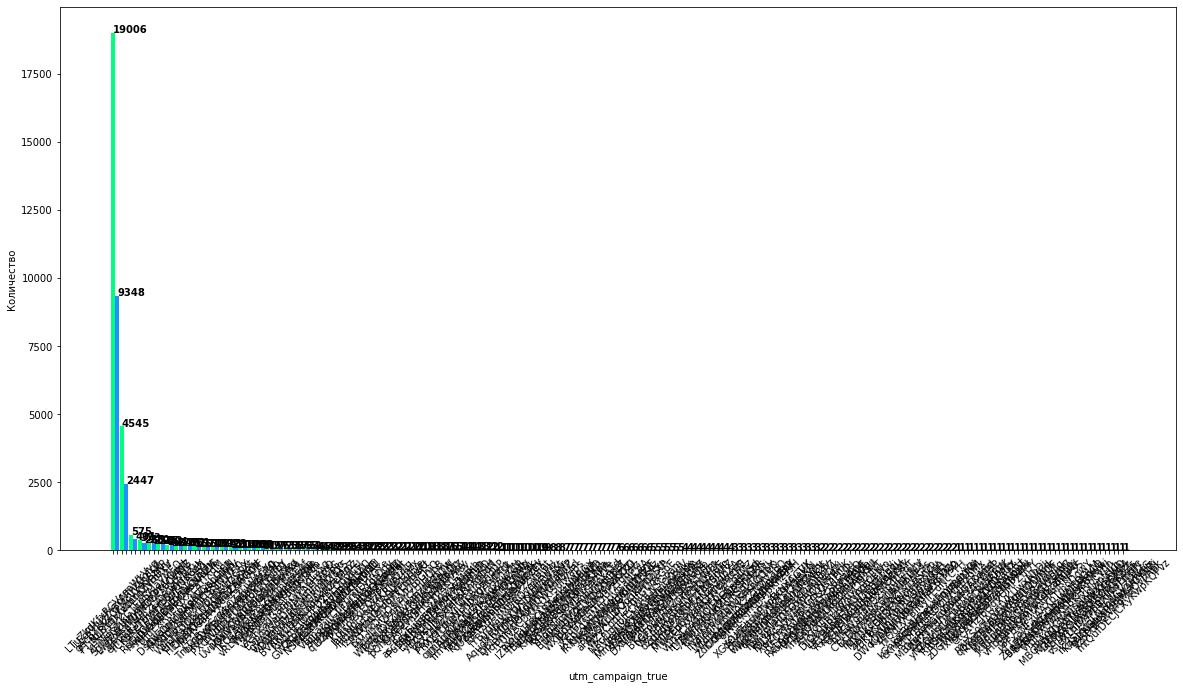

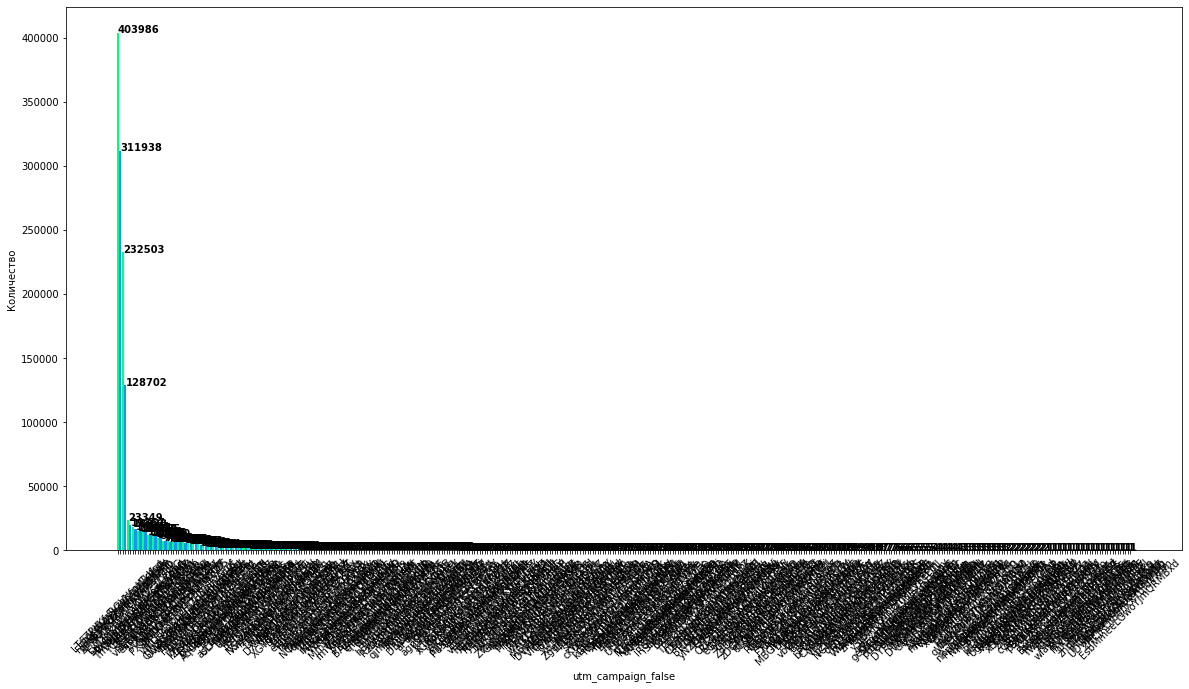

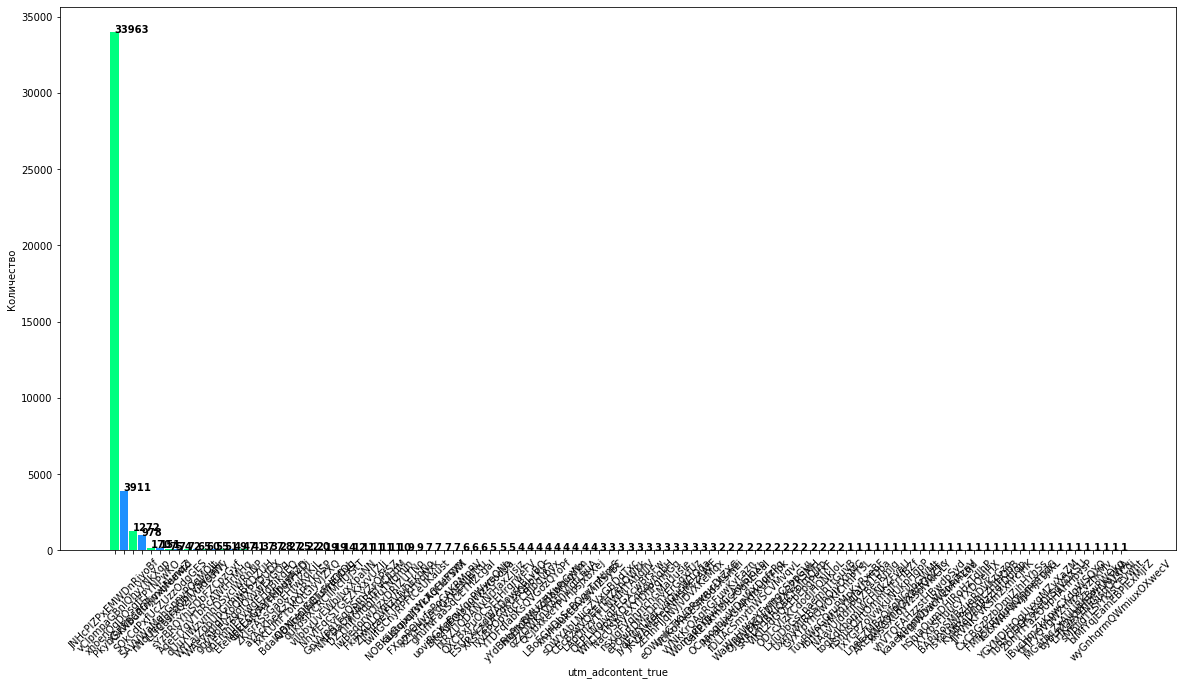

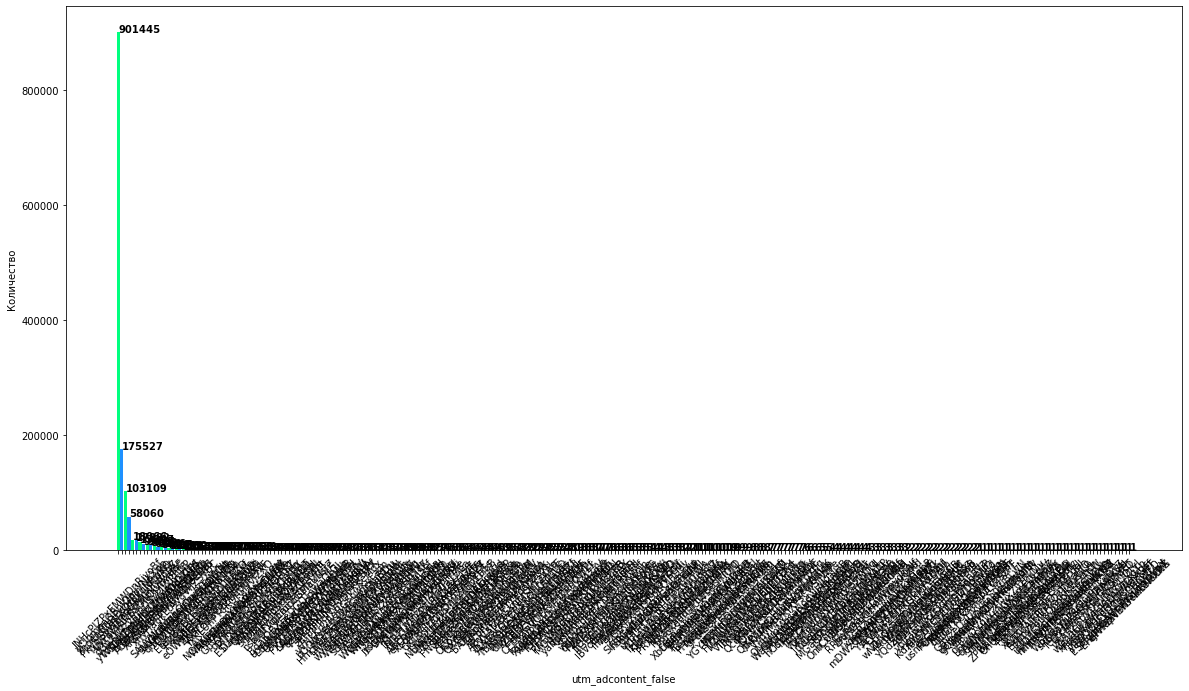

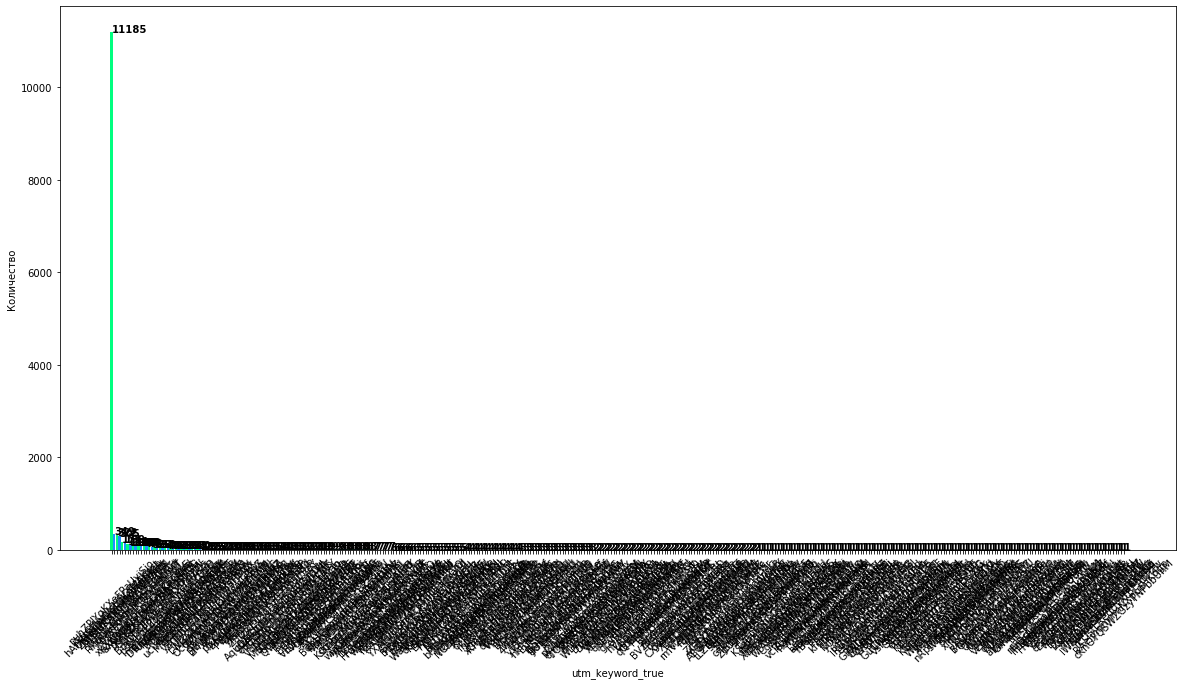

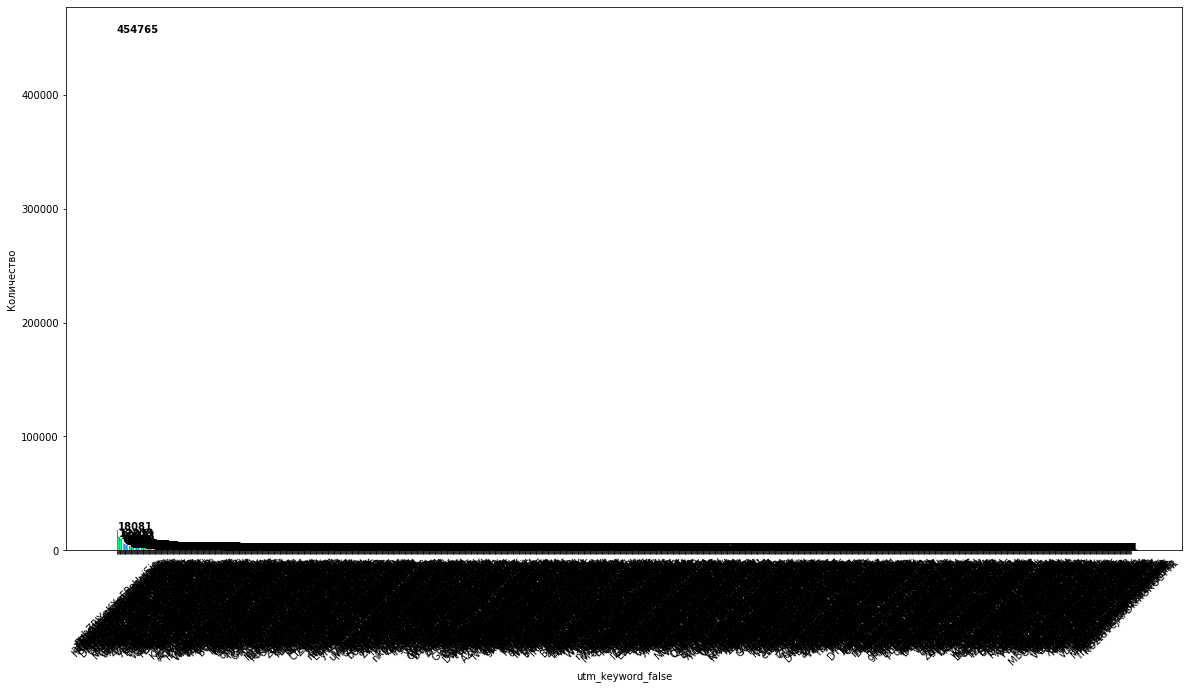

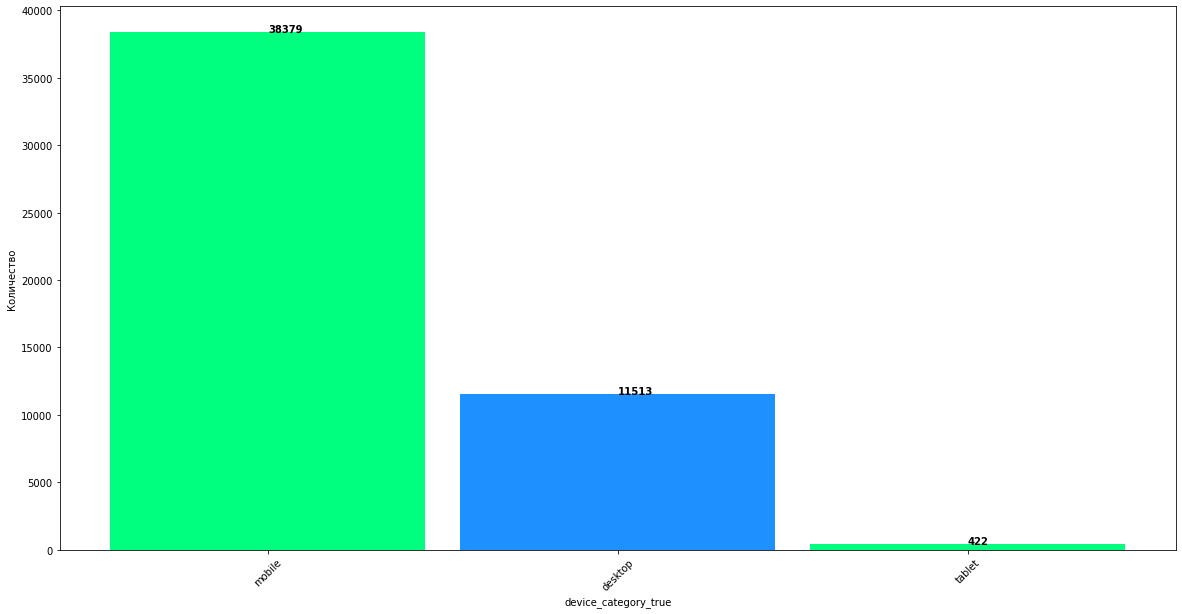

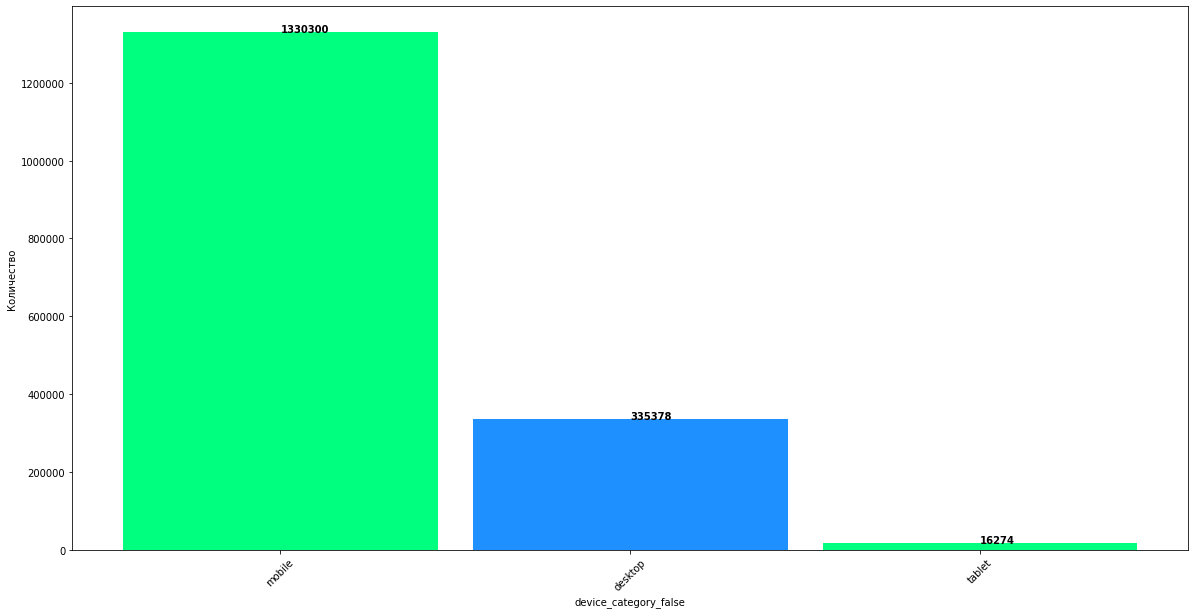

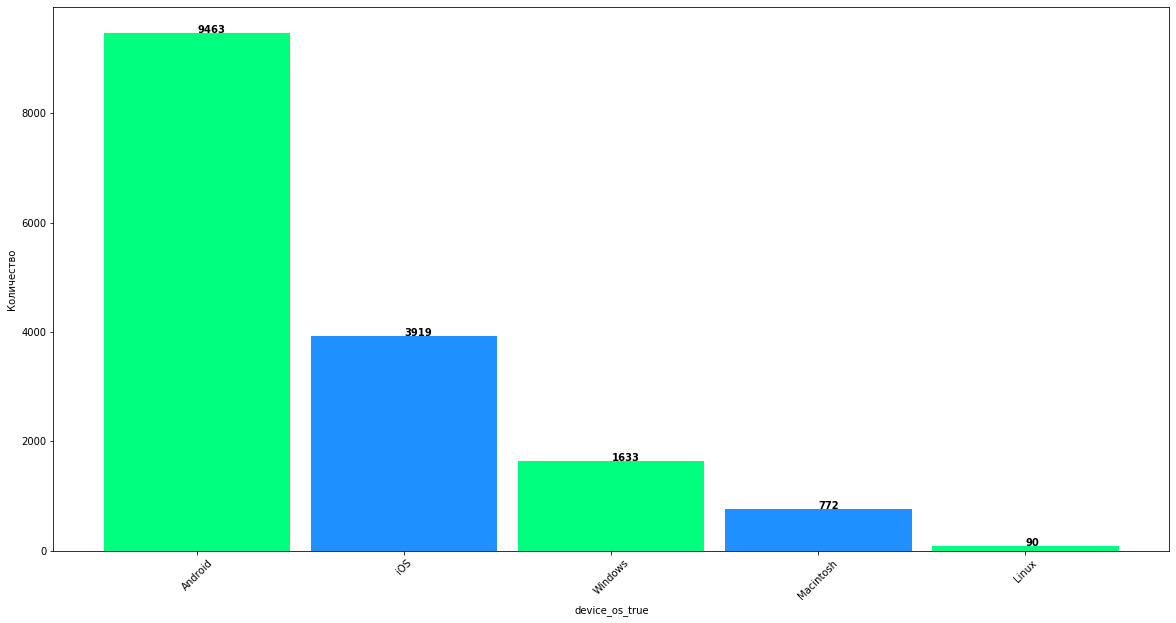

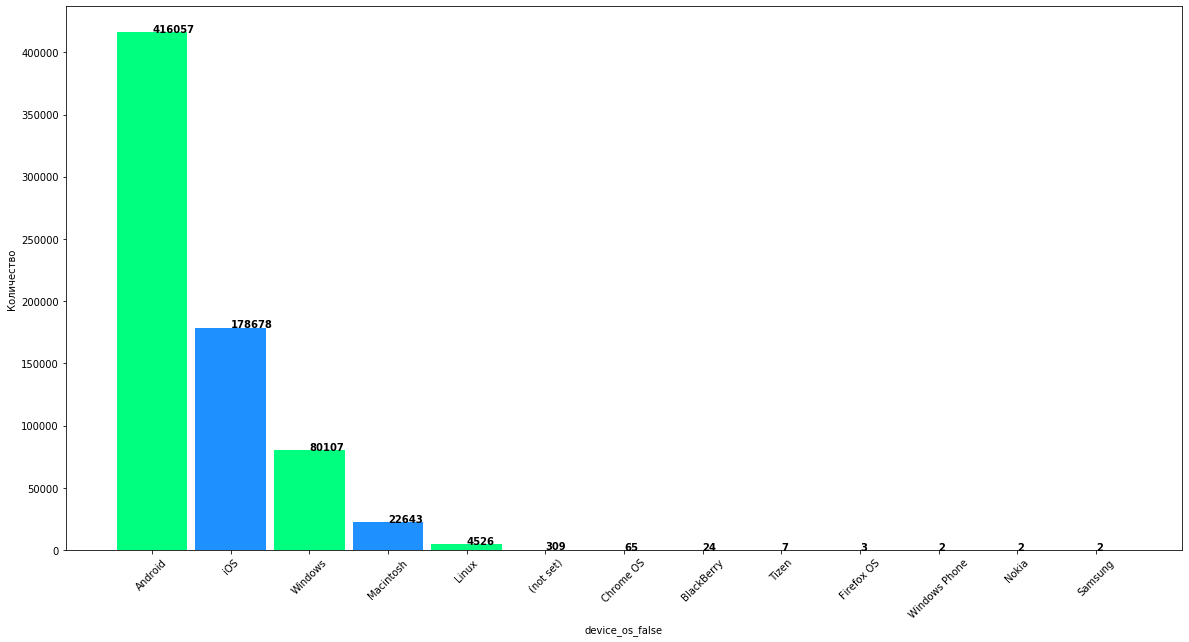

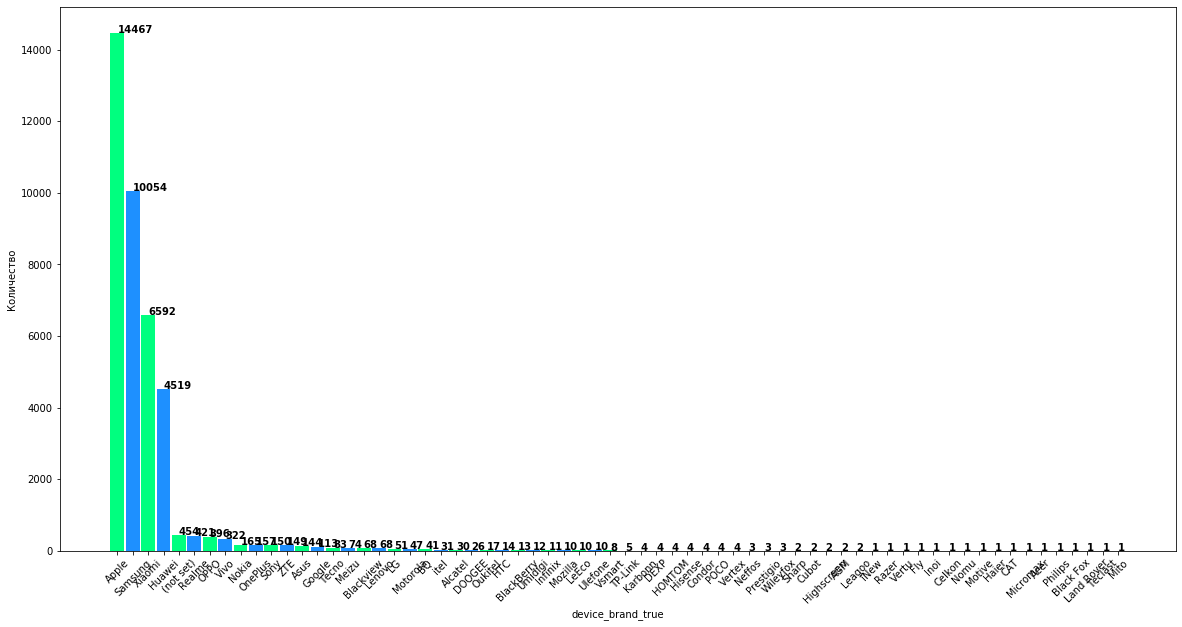

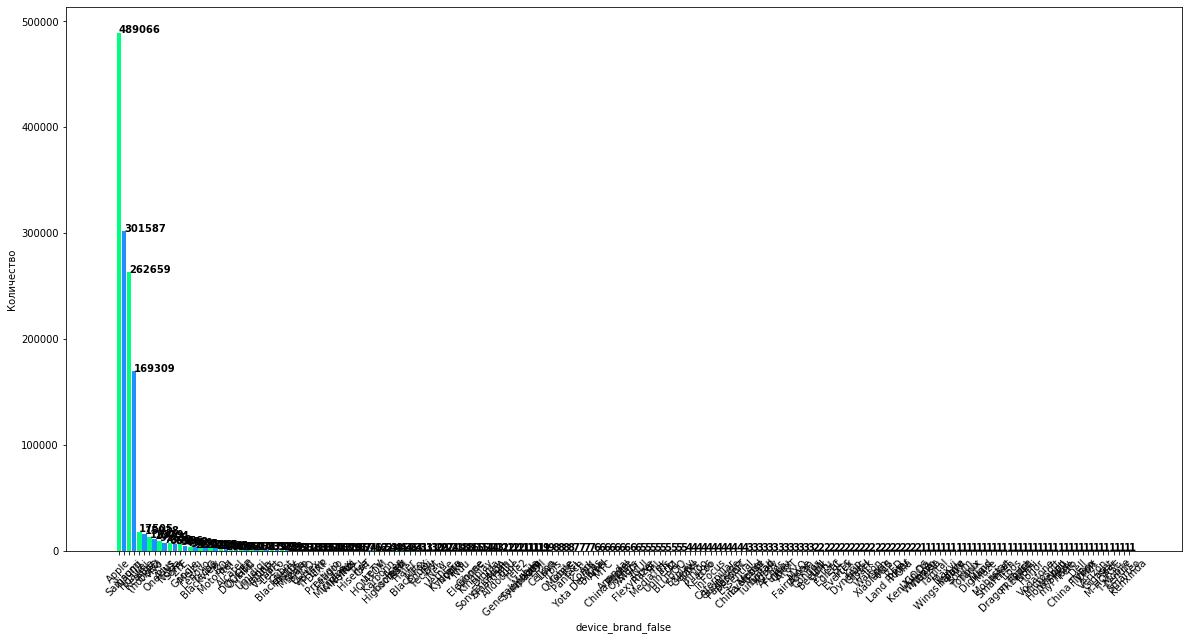

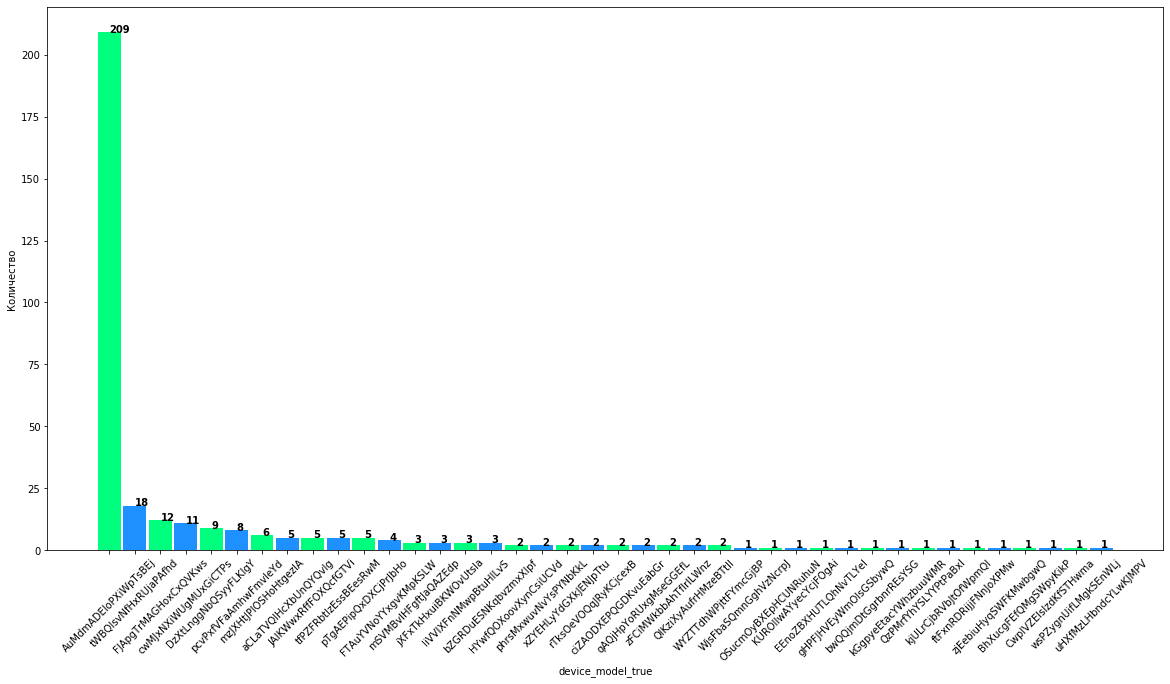

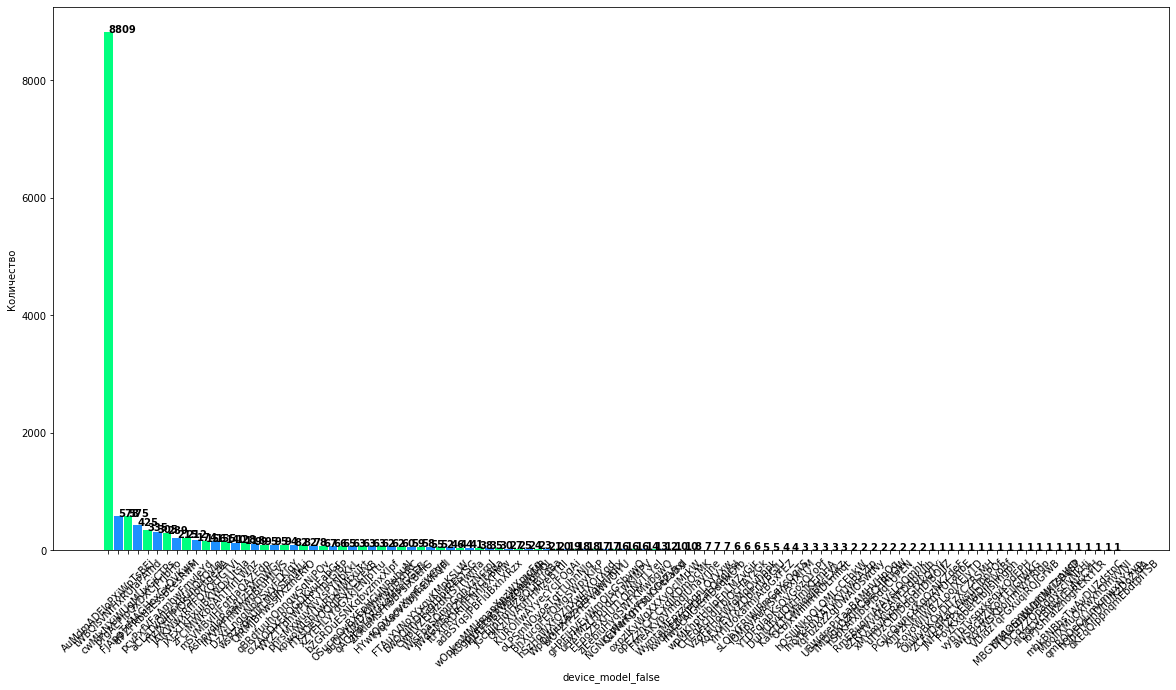

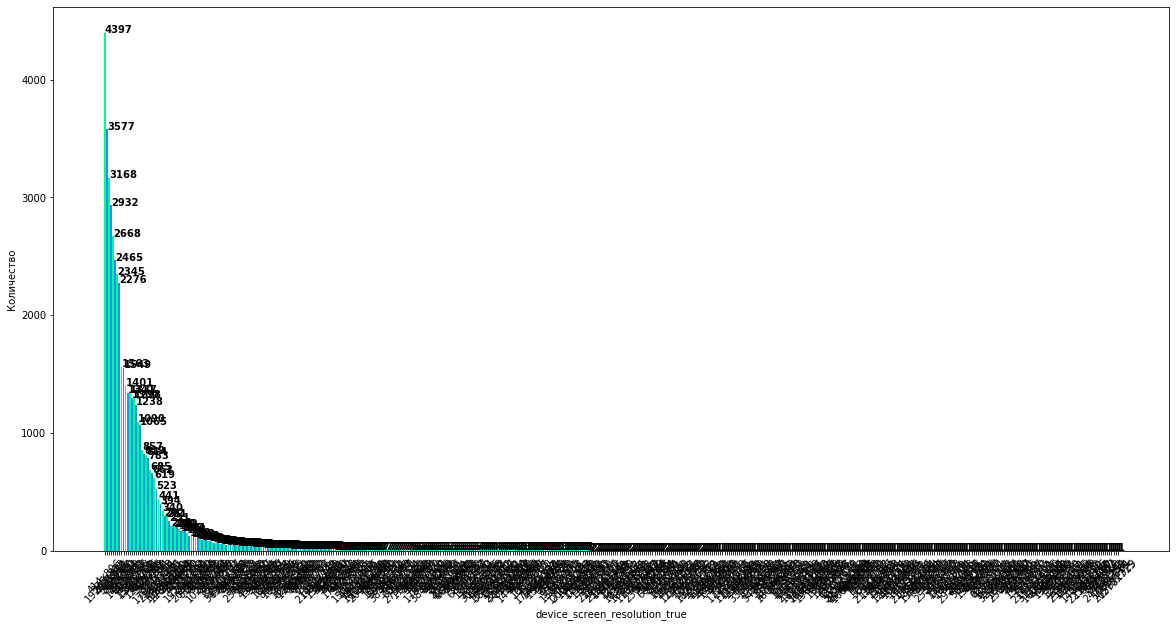

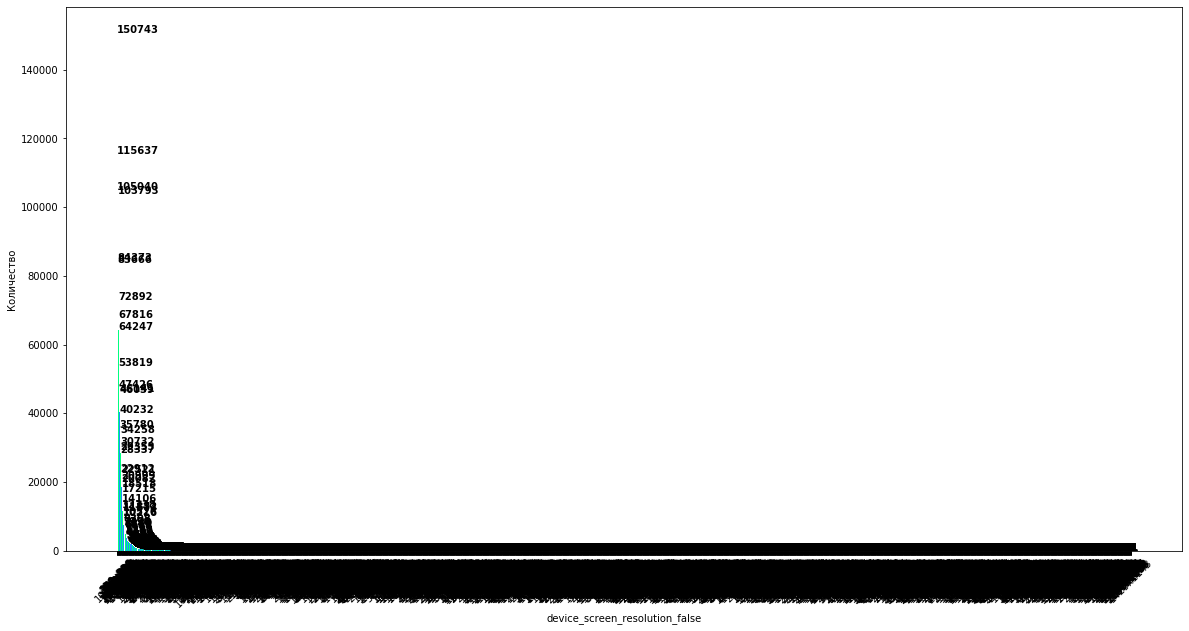

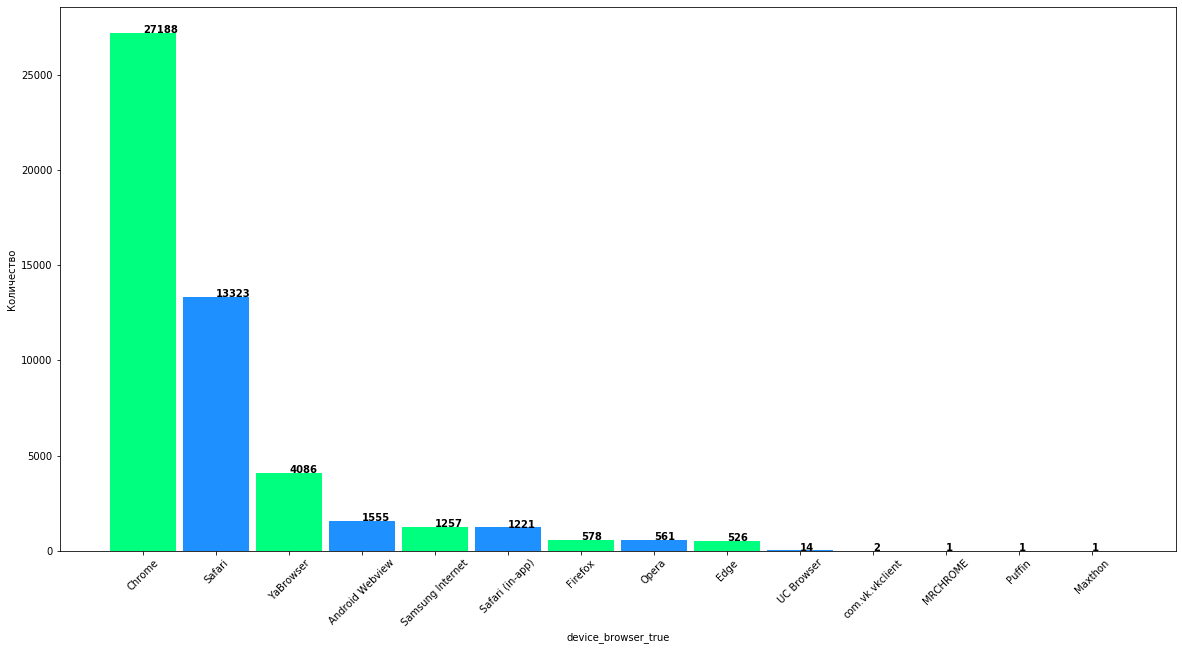

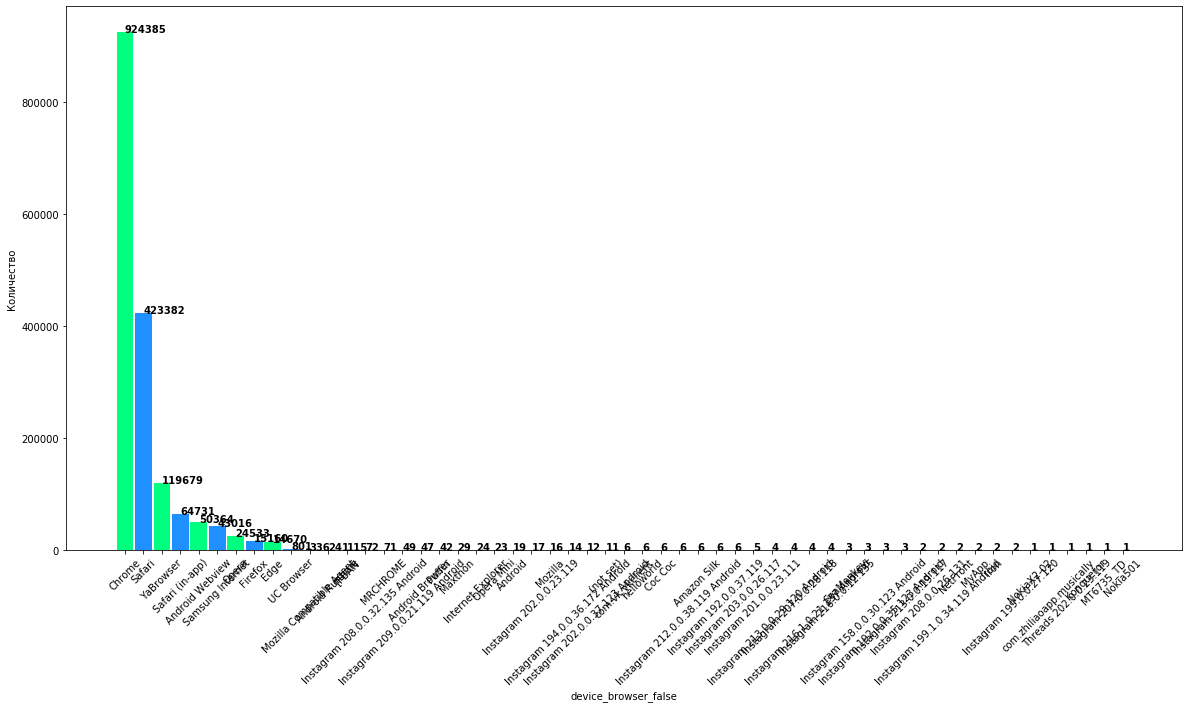

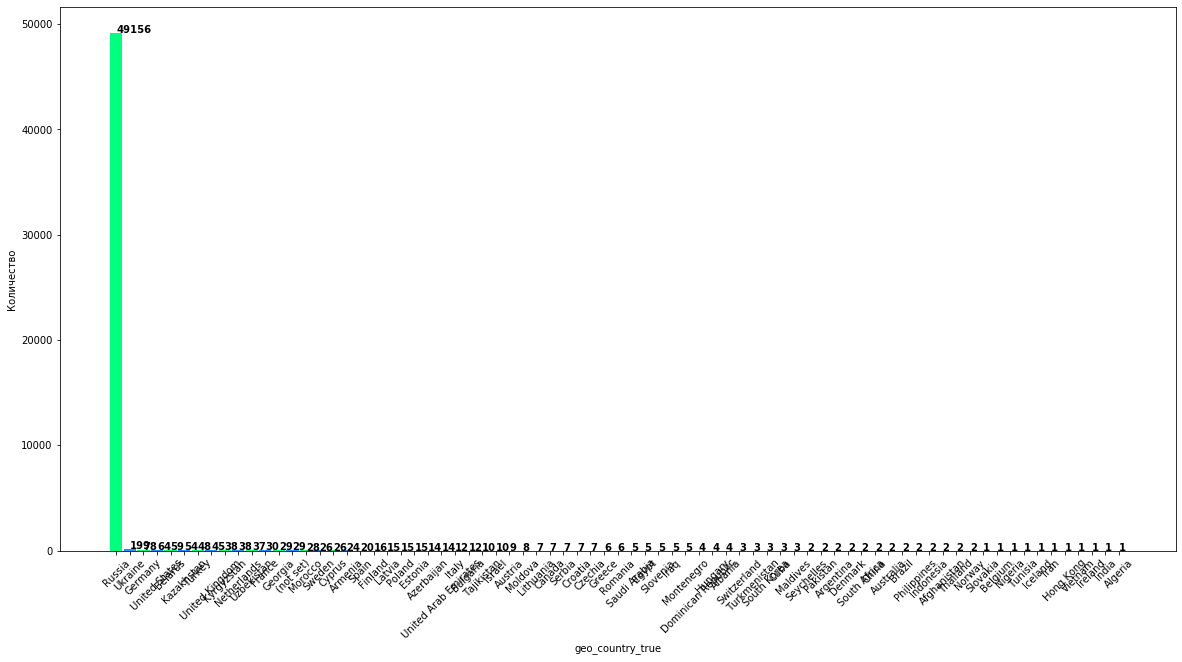

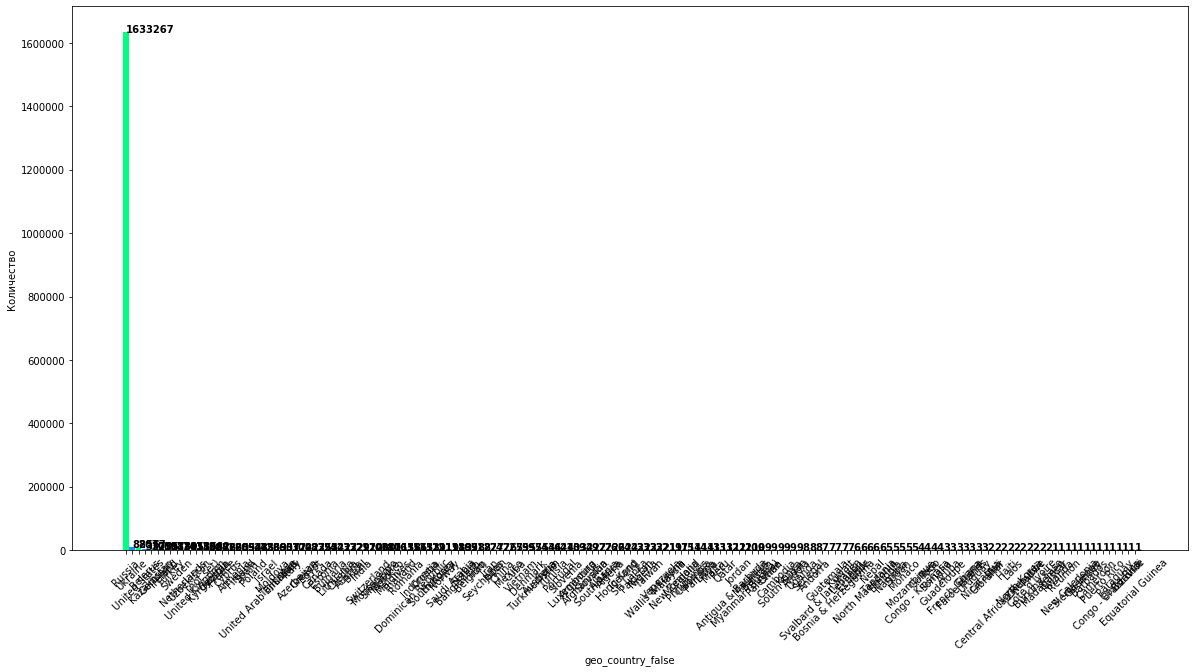

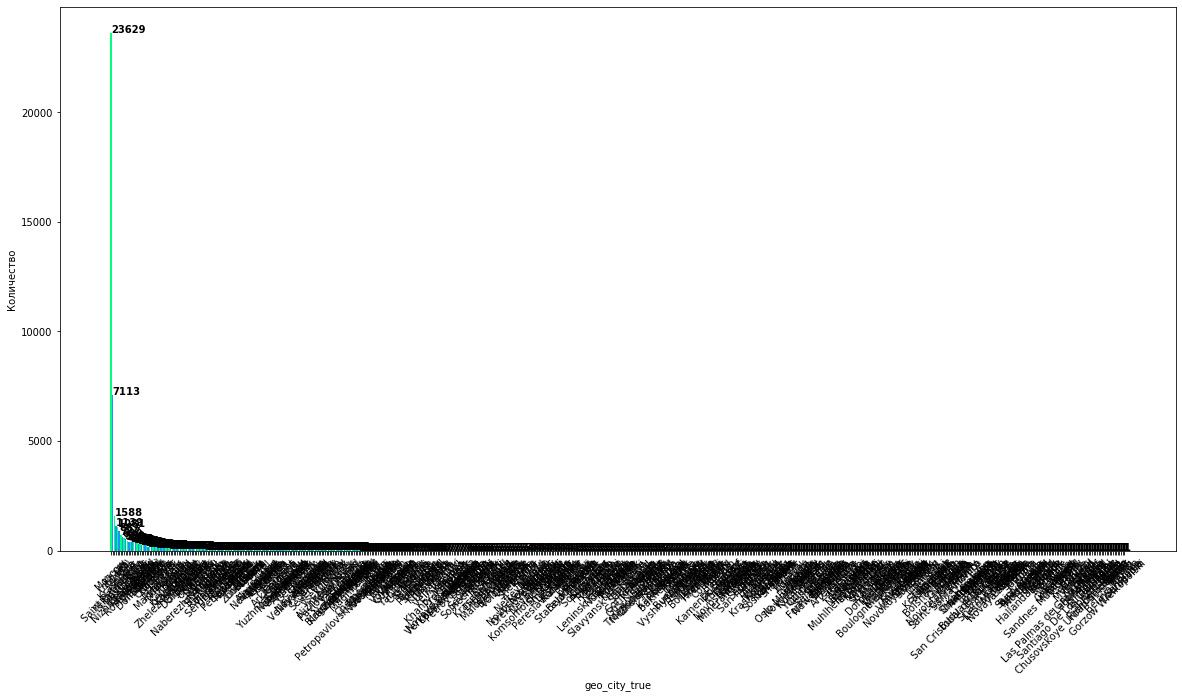

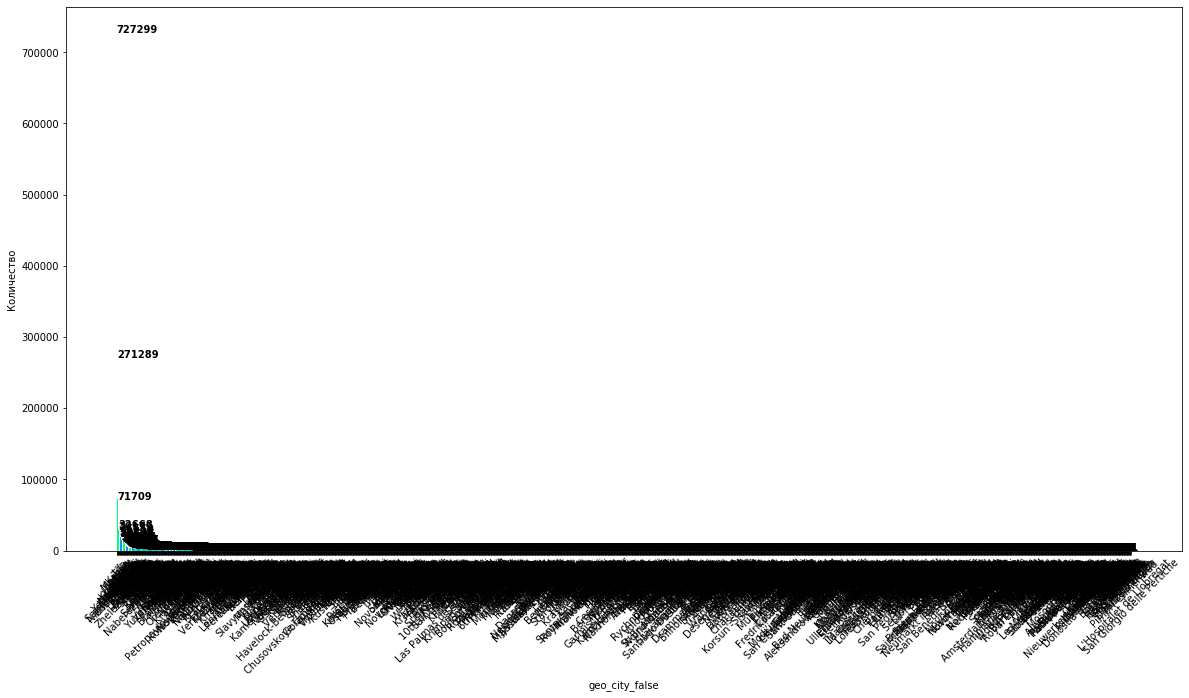

In [48]:
for col in src_col:
    for i, data in enumerate([df_true, df_false]):
        col_name = col + ('_true' if i == 0 else '_false')
        draw_bar_plot(data[col], col_name)

In [11]:
df.isnull().any(0)

client_id                   False
visit_date                  False
visit_time                  False
visit_number                False
utm_source                   True
utm_medium                  False
utm_campaign                 True
utm_adcontent                True
utm_keyword                  True
device_category             False
device_os                    True
device_brand                 True
device_model                 True
device_screen_resolution    False
device_browser              False
geo_country                 False
geo_city                    False
is_target_action            False
dtype: bool